In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Global variables:

num_videos = 141
n_timesteps = 125   # n_timesteps should be the same as maxlen for padding
vector_size = 75   #json file, landmark vector_size 

# delet
r = 100     #number of videos
m = 125     # number of frames (padded to max-len): this info is got from last block
n = 75    # number of landmark vector-size


## Read the csv file (input data) and do data preprocessing

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

base_dir = "/content/drive/My Drive/Google_Colab"
df = pd.read_csv(base_dir + '/' + 'input_data_3.csv', index_col = 0)

# print (df.head())

labels = df.index.tolist()
# get binary labels: if label=push, then is 1, and if label='other', then is 0
def binary_label(labels):
    binary_labels = []
    for l in labels:
        if l.split('_')[0]=='push':
            binary_labels.append(np.ones(n_timesteps))
        else:
            binary_labels.append(np.zeros(n_timesteps))
    return binary_labels

# get list of labels as 0 and 1
train_label_list = binary_label(labels)

# get x_train and Normalize it so all numbers get scaled between 0-1
input_data = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(input_data)

# reshaping the data to get the original shape of the input data
x_train= x_train_scaled.reshape(num_videos, n_timesteps, vector_size)
y_train = np.asarray(train_label_list)     #convert label list to numpy array

print(x_train.shape)
print (y_train.shape)


(141, 125, 75)
(141, 125)


In [0]:
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
print(y_train.shape)

(141, 125, 1)


In [0]:
print(x_train.shape)
print (y_train.shape)

(141, 125, 75)
(141, 125, 1)


## Model Configuration

In [0]:
## Deep learning model:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from keras import optimizers

n_timesteps = 125   # same as maxlen padded   
n_features = 75    # same as vector size of landmark
cells = 5       

model = Sequential()
model.add(LSTM(cells, input_shape=(n_timesteps,n_features), dropout=0.1, recurrent_dropout=0.5, return_sequences = True))
model.add(Dense(1))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])                   # optmizer='rmsprop'/ 'sgd' 

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 125, 5)            1620      
_________________________________________________________________
dense (Dense)                (None, 125, 1)            6         
Total params: 1,626
Trainable params: 1,626
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 8    #10
history = model.fit(x=x_train, y=y_train, validation_split = 0.15, batch_size=5, epochs=epochs, shuffle=True)

Epoch 1/8
24/24 [==============================] - 3s 106ms/step - loss: 0.6135 - accuracy: 0.7291 - val_loss: 0.4748 - val_accuracy: 0.8327
Epoch 2/8
24/24 [==============================] - 2s 91ms/step - loss: 0.4487 - accuracy: 0.8522 - val_loss: 0.3852 - val_accuracy: 0.9160
Epoch 3/8
24/24 [==============================] - 2s 92ms/step - loss: 0.3692 - accuracy: 0.8713 - val_loss: 0.3119 - val_accuracy: 0.9196
Epoch 4/8
24/24 [==============================] - 2s 89ms/step - loss: 0.3510 - accuracy: 0.8508 - val_loss: 0.2442 - val_accuracy: 0.9116
Epoch 5/8
24/24 [==============================] - 2s 89ms/step - loss: 0.3177 - accuracy: 0.8711 - val_loss: 0.2131 - val_accuracy: 0.9193
Epoch 6/8
24/24 [==============================] - 2s 90ms/step - loss: 0.2849 - accuracy: 0.8957 - val_loss: 0.2286 - val_accuracy: 0.9465
Epoch 7/8
24/24 [==============================] - 2s 93ms/step - loss: 0.3093 - accuracy: 0.8741 - val_loss: 0.1811 - val_accuracy: 0.9284
Epoch 8/8
24/24 [==

## Saving the trained model

In [0]:
import json

model_dir = '/content/drive/My Drive/Google_Colab/saved_models'

model_json = model.to_json()
with open(model_dir + "/P06_LSTM_model7.json", "w") as json_file:
    json_file.write(model_json)
    # serialize weights to HDF5
model.save_weights(model_dir + "/P06_LSTM_model7.h5")
print("Saved model to disk")

Saved model to disk


## Plotting Results

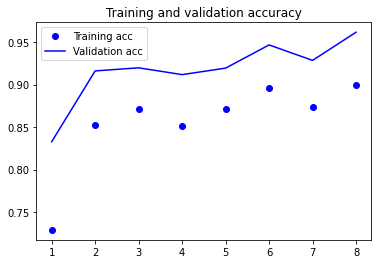

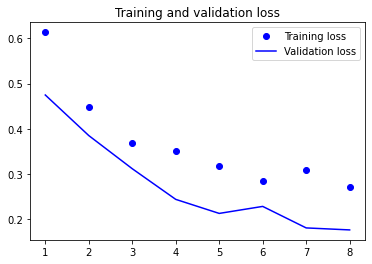

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Training and Validation accuracy over epoch
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot Training and Validation loss over epoch
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()